## Instance Based Learning Vs. Model Based Learning

**KNN**
![Jupyter](./knn_complexity.svg)

**Regression**
![Jupyter](./regression_complexity.png)

## Introduction To The Data

* Lot Area: Lot size in square feet.
* Overall Qual: Rates the overall material and finish of the house.
* Overall Cond: Rates the overall condition of the house.
* Year Built: Original construction date.
* Low Qual Fin SF: Low quality finished square feet (all floors).
* Full Bath: Full bathrooms above grade.
* Fireplaces: Number of fireplaces.

In [2]:
import pandas as pd

In [7]:
data = pd.read_csv('AmesHousing.txt', sep='\t')

In [8]:
train = data.iloc[:1460,:]
test = data.iloc[1460:, :]

In [11]:
target = 'SalePrice'

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## Simple Linear Regression

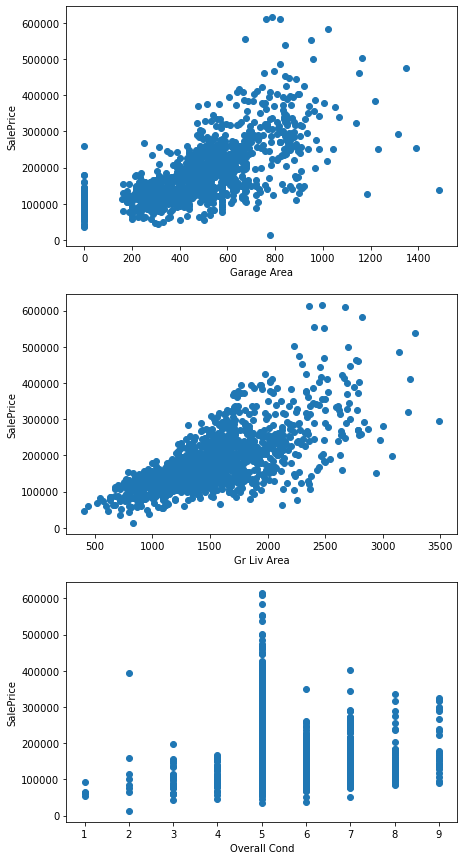

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 15))

ax1 = fig.add_subplot(3,1,1)
ax1.scatter(train['Garage Area'], train['SalePrice'])
ax1.set_xlabel('Garage Area')
ax1.set_ylabel('SalePrice')

ax2 = fig.add_subplot(3,1,2)
ax2.scatter(train['Gr Liv Area'], train['SalePrice'])
ax2.set_xlabel('Gr Liv Area')
ax2.set_ylabel('SalePrice')

ax3 = fig.add_subplot(3,1,3)
ax3.scatter(train['Overall Cond'], train['SalePrice'])
ax3.set_xlabel('Overall Cond')
ax3.set_ylabel('SalePrice')

plt.show()

## Least Squares

In [14]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


From the analysis above, we can see  column `Gr Liv Area` have the strongest correlation with `SalePrice`

$RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

$\hat{y} = a_1*Gr \ Liv \ Area + a_0$

## Using Scikit-Learn To Train And Predict

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(train[['Gr Liv Area']], train['SalePrice'])

LinearRegression()

In [38]:
a1 = model.coef_
a0 = model.intercept_

In [39]:
print(a1, a0)

[116.86624683] 5366.821710056043


## Making Predictions

In [40]:
test_preds = model.predict(test[['Gr Liv Area']])

test_rmse = mean_squared_error(test['SalePrice'], test_preds)**0.5


train_preds = model.predict(train[['Gr Liv Area']])
train_rmse = mean_squared_error(train['SalePrice'], train_preds)**0.5

In [41]:
print(test_rmse, train_rmse)

57088.25161263909 56034.362001412796


## Multiple Linear Regression

In [42]:
cols = ['Overall Cond', 'Gr Liv Area']

model = LinearRegression()

model.fit(train[cols], train['SalePrice'])

LinearRegression()

In [43]:
print(model.coef_)
print(model.intercept_)

[-409.56846611  116.73118339]
7858.691146390425


In [46]:
test_preds_2 = model.predict(test[cols])
test_rmse_2 = mean_squared_error(test['SalePrice'], test_preds_2)**0.5


train_preds_2 = model.predict(train[cols])
train_rmse_2 = mean_squared_error(train['SalePrice'], train_preds_2)**0.5

In [47]:
print(test_rmse_2, train_rmse_2)

57066.90779448559 56032.39801525867
